In [24]:
#Importing the basic librarires for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [25]:
#Importing the dataset
df =pd.read_excel(r"C:\Users\Pooja\Desktop\new_online payment.xlsx")
#df

In [26]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [27]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
99996,10,PAYMENT,18345.49,C744303677,6206.0,0.00,M1785344556,0.00,0.00,0
99997,10,CASH_IN,183774.91,C104331851,39173.0,222947.91,C36392889,54925.05,0.00,0
99998,10,CASH_OUT,82237.17,C707662966,6031.0,0.00,C1553004158,592635.66,799140.46,0
99999,10,PAYMENT,20096.56,C1868032458,110117.0,90020.44,M1419201886,0.00,0.00,0
100000,10,CASH_OUT,578570.34,C1842020389,0.0,0.00,C1750350389,782692.89,1735465.73,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100001 non-null  int64  
 1   type            100001 non-null  object 
 2   amount          100001 non-null  float64
 3   nameOrig        100001 non-null  object 
 4   oldbalanceOrg   100001 non-null  float64
 5   newbalanceOrig  100001 non-null  float64
 6   nameDest        100001 non-null  object 
 7   oldbalanceDest  100001 non-null  float64
 8   newbalanceDest  100001 non-null  float64
 9   isFraud         100001 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 7.6+ MB


In [29]:
df.describe() #always catch numerical column

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,100001.000000,1.000010e+05,1.000010e+05,1.000010e+05,1.000010e+05,1.000010e+05,100001.00000
mean,8.472915,1.735460e+05,8.726972e+05,8.536024e+05,8.805087e+05,1.184087e+06,0.00477
std,1.890352,3.436215e+05,2.662180e+06,2.628870e+06,2.402294e+06,2.802508e+06,0.06890
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000
25%,8.000000,9.963630e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000
50%,9.000000,5.275432e+04,2.003600e+04,0.000000e+00,2.083986e+04,4.990918e+04,0.00000
75%,10.000000,2.117737e+05,1.890543e+05,2.057281e+05,5.882913e+05,1.058252e+06,0.00000
max,10.000000,1.000000e+07,3.380000e+07,3.400000e+07,3.400000e+07,3.890000e+07,1.00000


In [30]:
#df.describe(include="all")  #catches all the data

In [31]:
df.shape

(100001, 10)

In [32]:
df.size

1000010

In [33]:
df.columns #function which run without parenthesis

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

# Check Missing Value

In [34]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

There are no null values in our dataset.

In [35]:
df.type.value_counts()

PAYMENT     39512
CASH_OUT    30719
CASH_IN     20185
TRANSFER     8597
DEBIT         988
Name: type, dtype: int64

In [36]:
df.isFraud.value_counts()

0    99524
1      477
Name: isFraud, dtype: int64

In [37]:
df.step.value_counts()

9     37628
10    27275
8     21097
7      6837
1      3722
5      2325
4       565
3       552
Name: step, dtype: int64

# Correlation

In [38]:
x=df.corr()
x

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.077097,-0.004123,-0.006899,0.008537,0.011238,-0.026994
amount,0.077097,1.000000,-0.012355,-0.017980,0.246217,0.373701,0.012309
oldbalanceOrg,-0.004123,-0.012355,1.000000,0.968010,0.106402,0.074959,0.172649
newbalanceOrig,-0.006899,-0.017980,0.968010,1.000000,0.104682,0.071620,-0.020742
oldbalanceDest,0.008537,0.246217,0.106402,0.104682,1.000000,0.938688,0.013516
newbalanceDest,0.011238,0.373701,0.074959,0.071620,0.938688,1.000000,0.008370
isFraud,-0.026994,0.012309,0.172649,-0.020742,0.013516,0.008370,1.000000


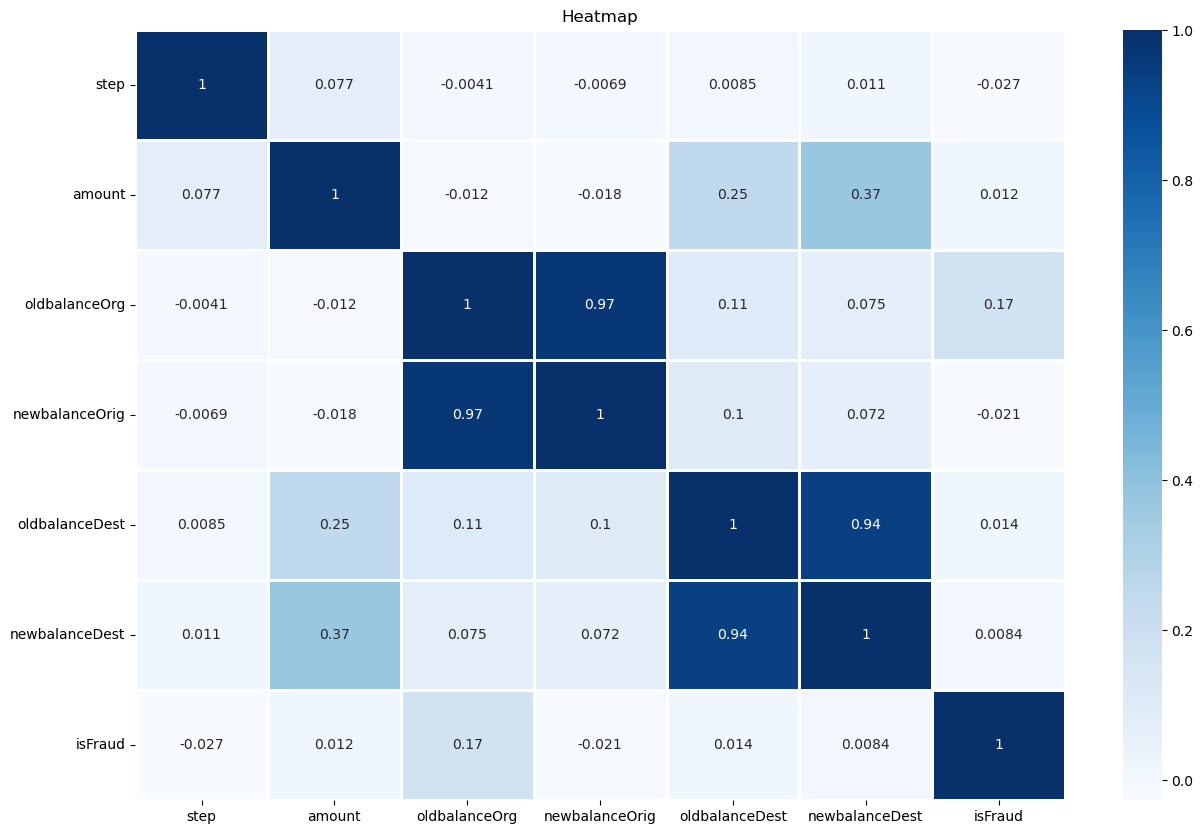

In [39]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(x,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("Heatmap")
plt.show()

oldbalanceOrg and newbalanceOrig has strong positive relationship. oldbalanceDest and newbalanceDest has strong positive relationship. oldbalanceOrg and amount has weak positive relationship. newbalanceOrig and amount has moderate positive relationship.

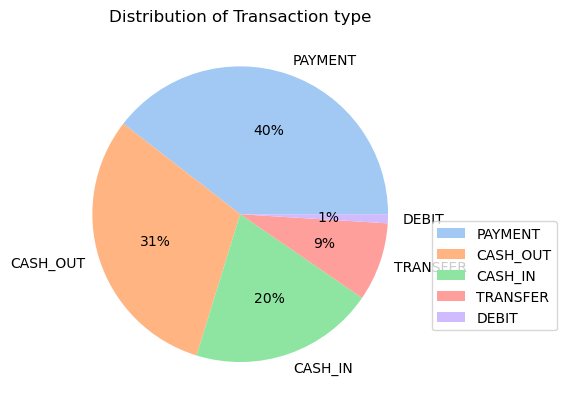

In [40]:
Type=df['type'].value_counts()
data=Type.values
labels=Type.index
colors=sns.color_palette('pastel')[0:8]
plt.pie(data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title('Distribution of Transaction type')
plt.legend(labels,loc='best',bbox_to_anchor=(1,0.5))
plt.show()

Cash out is the most useable transaction type as compair to payment, cash in, transfer and debit types.

Text(0.5, 1.0, 'Distribution Of transaction amount')

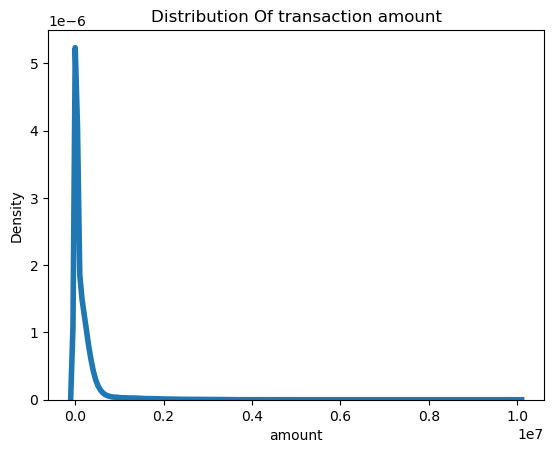

In [41]:
sns.kdeplot(df["amount"],linewidth=4)
plt.title("Distribution Of transaction amount")

 the above distribution of transaction amount is Right-skewed.

In [42]:
df['nameOrig'].value_counts()

C1231006815    1
C363543566     1
C1531360241    1
C1802124274    1
C1910868687    1
              ..
C1919952997    1
C668560116     1
C986934168     1
C1567015632    1
C1842020389    1
Name: nameOrig, Length: 100001, dtype: int64

Text(0.5, 1.0, 'Distribution Of transaction amount')

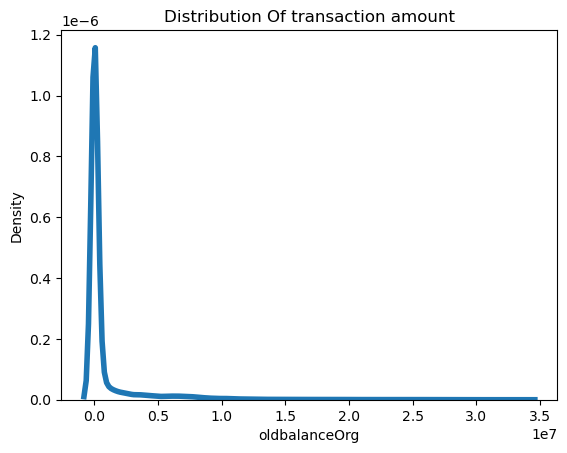

In [43]:
sns.kdeplot(df["oldbalanceOrg"],linewidth=4)
plt.title("Distribution Of transaction amount")

 the above distribution of transaction amount is Right-skewed.

Text(0.5, 1.0, 'Distribution Of transaction amount')

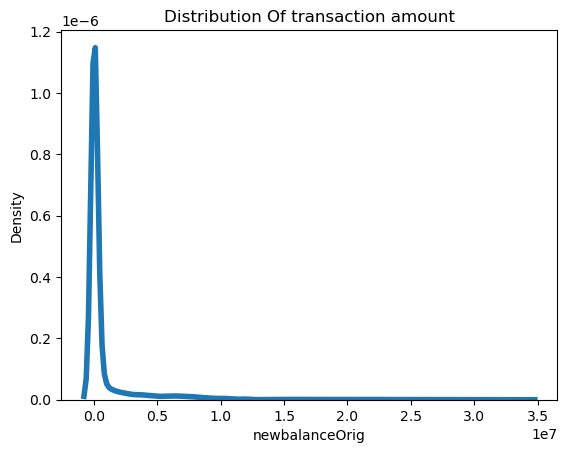

In [44]:
sns.kdeplot(df["newbalanceOrig"],linewidth=4)
plt.title("Distribution Of transaction amount")

 the above distribution of transaction amount is Right-skewed.

In [45]:
df['nameDest'].value_counts()

C985934102     78
C1286084959    72
C248609774     71
C1590550415    69
C2083562754    66
               ..
M259075709      1
M375566378      1
M1225444842     1
M1709995863     1
M1419201886     1
Name: nameDest, Length: 51551, dtype: int64

Text(0.5, 1.0, 'Distribution of transaction amount')

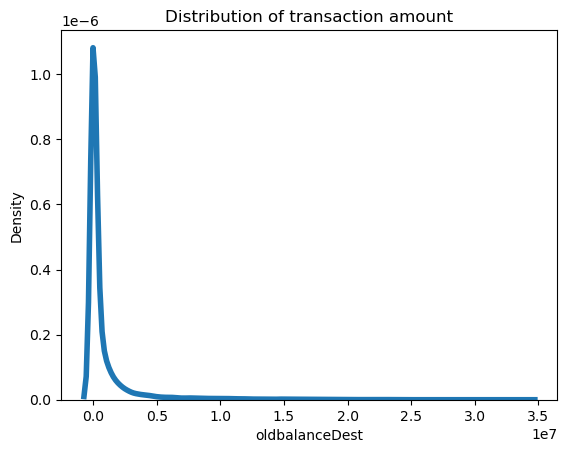

In [46]:
sns.kdeplot(df['oldbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

 the above distribution of transaction amount is Right-skewed.

Text(0.5, 1.0, 'Distribution of transaction amount')

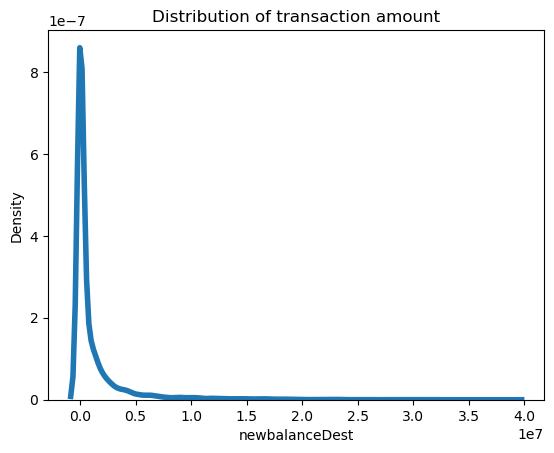

In [47]:
sns.kdeplot(df['newbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

The distribution of post-transaction balances of the recipient is right skewed.

There are much more non-fraudulent transactions than fraudulent transactions.

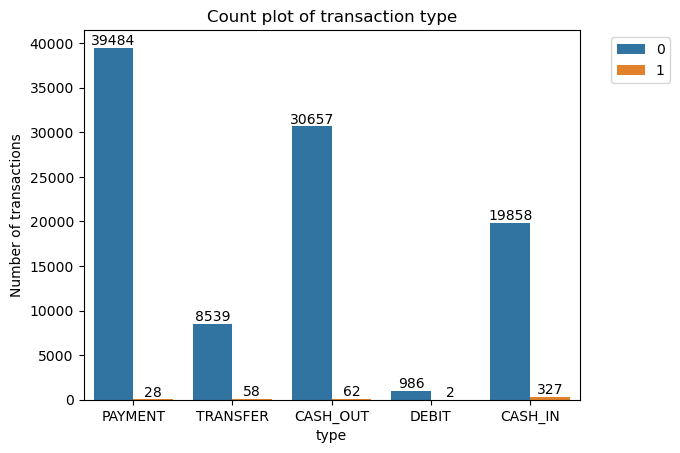

In [48]:
ax = sns.countplot(x='type', data=df, hue='isFraud')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

del ax

# Convert Categorical Variable to Numeric Variable

In [49]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [51]:
df.type=le.fit_transform(df.type)
df.nameOrig=le.fit_transform(df.nameOrig)
df.nameDest =le.fit_transform(df.nameDest)

In [52]:
df.dtypes

step                int64
type                int32
amount            float64
nameOrig            int32
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest            int32
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

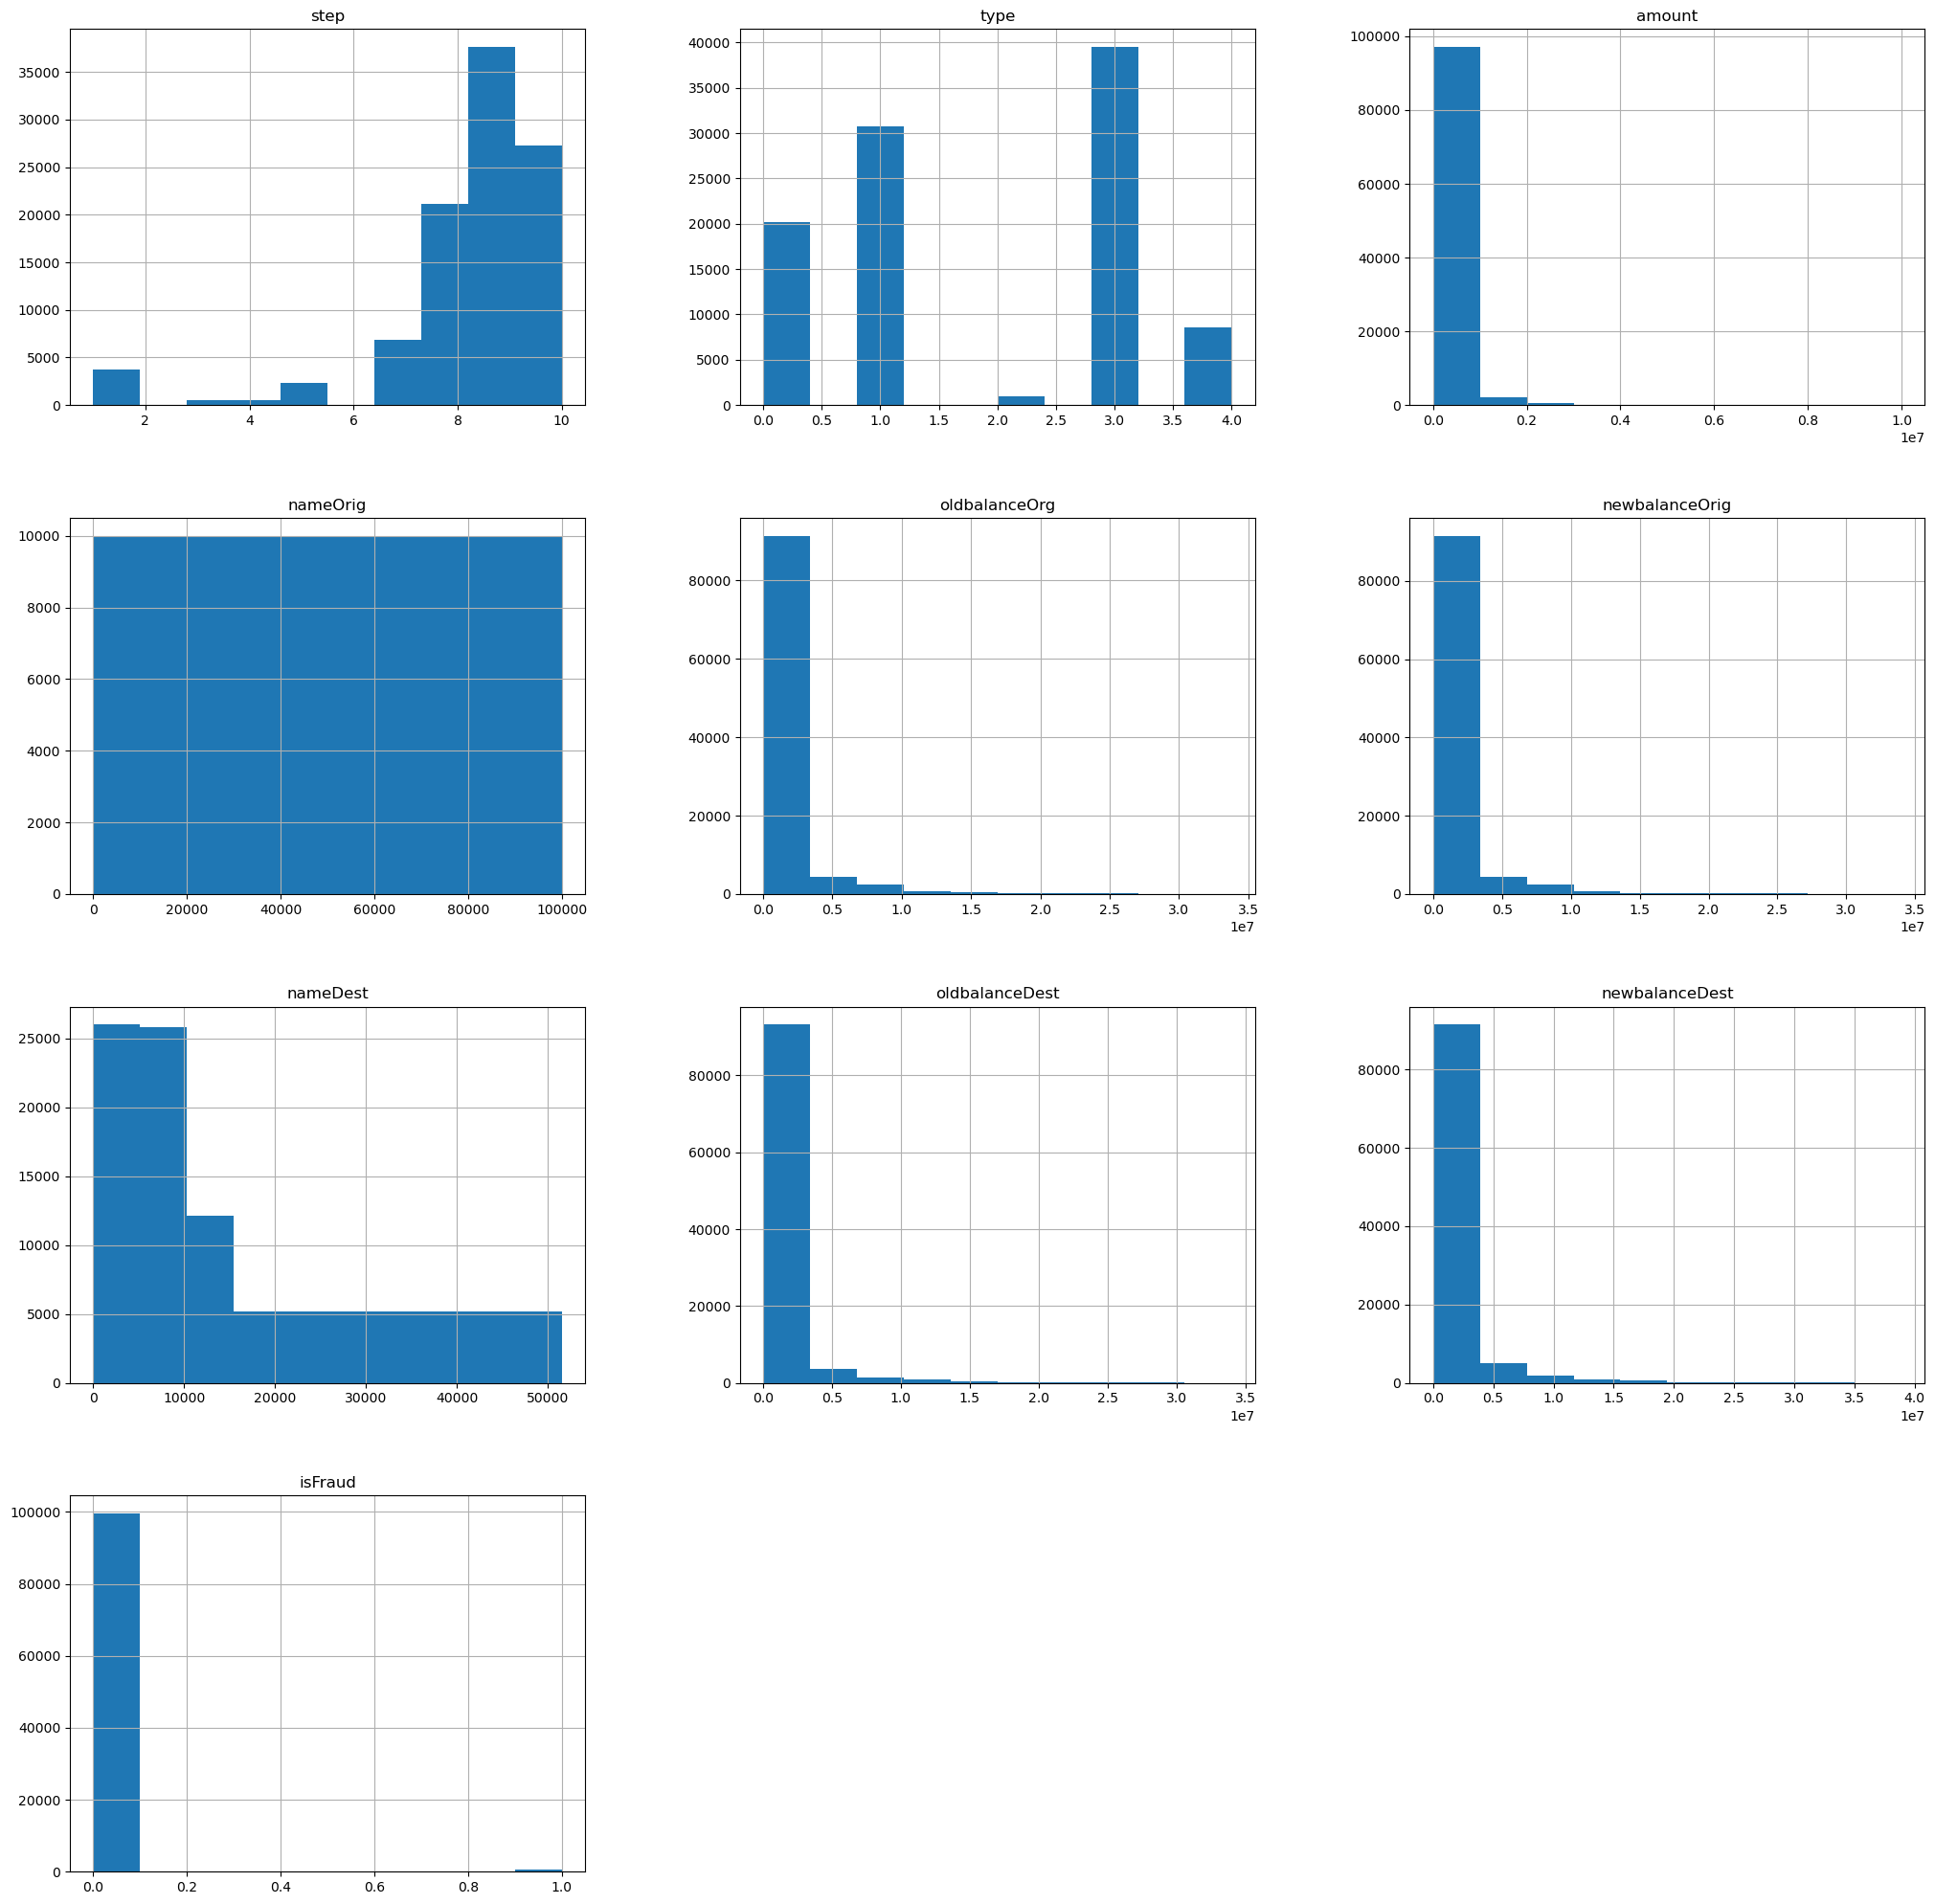

In [53]:
df.hist(figsize=(25,25))
plt.show()

In [54]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

# spliting into test & train

In [55]:
x=df.iloc[:,0:8]
y=df.iloc[:,-1]

In [56]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80000, 8), (20001, 8), (80000,), (20001,))

# Model Building 

# Ada Boost

In [58]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ad=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=2)

In [59]:
ad.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=2)

In [60]:
ad_p=ad.predict(x_test)

In [61]:
ad_cf=confusion_matrix(ad_p,y_test)
ad_cf

array([[19907,     8],
       [    4,    82]], dtype=int64)

In [62]:
ad_acc=ad_cf.diagonal().sum()/ad_cf.sum()*100
ad_acc

99.94000299985001

In [63]:
from sklearn.metrics import classification_report
print(classification_report(ad_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19915
           1       0.91      0.95      0.93        86

    accuracy                           1.00     20001
   macro avg       0.96      0.98      0.97     20001
weighted avg       1.00      1.00      1.00     20001



In [143]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [144]:
f=print(f1_score(y_test, ad_p, average="macro"))
p=print(precision_score(y_test,ad_p, average="macro"))
r=print(recall_score(y_test,ad_p, average="macro"))

0.9657584355583151
0.976543332418593
0.955455108566454


In [145]:
f1_score(y_test, ad_p, average='weighted')

0.9993932422871376

In [146]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test, ad_p)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.99959829 0.95348837]
recall: [0.99979911 0.91111111]
fscore: [0.99969869 0.93181818]
support: [19911    90]


In [147]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [148]:
roc=roc_auc_score(ad_p,y_test)
roc

0.9765433324185929

In [150]:
ad_prob=ad.predict_proba(x_test)
ad_prob

array([[1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       ...,
       [1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16]])

In [151]:
DF=pd.DataFrame(ad_prob)
DF

,0,1
0,1.0,2.220446e-16
1,1.0,2.220446e-16
2,1.0,2.220446e-16
3,1.0,2.220446e-16
4,1.0,2.220446e-16
...,...,...
19996,1.0,2.220446e-16
19997,1.0,2.220446e-16
19998,1.0,2.220446e-16
19999,1.0,2.220446e-16


In [152]:
fpr,tpr,threshold=roc_curve(y_test,DF.iloc[:,1])

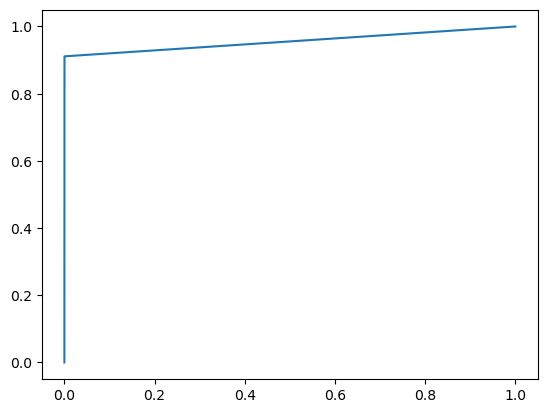

In [153]:
plt.plot(fpr,tpr)

In [154]:
#PRC Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [155]:
precision,recall,threshold=precision_recall_curve(y_test,DF.iloc[:,1])

Text(0.5, 1.0, 'AUC-ROC Curve')

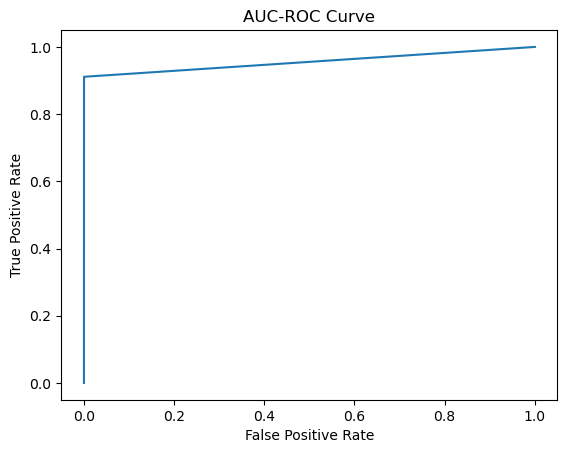

In [157]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")

# Decision Tree Regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [65]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [66]:
dtr_p=dtr.predict(x_test)

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
dtr=confusion_matrix(dtr_p,y_test)
dtr

array([[19904,     8],
       [    7,    82]], dtype=int64)

In [69]:
dt_acc=dtr.diagonal().sum()/dtr.sum()*100
dt_acc

99.92500374981252

In [70]:
from sklearn.metrics import classification_report
print(classification_report(dtr_p,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19912
         1.0       0.91      0.92      0.92        89

    accuracy                           1.00     20001
   macro avg       0.96      0.96      0.96     20001
weighted avg       1.00      1.00      1.00     20001



# Random Forest

In [72]:
from sklearn.ensemble  import RandomForestClassifier
rf=RandomForestClassifier()

In [73]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [74]:
rf_p=rf.predict(x_test)

In [75]:
rf_cf=confusion_matrix(rf_p,y_test)
rf_cf

array([[19911,    20],
       [    0,    70]], dtype=int64)

In [76]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

99.90000499975001

In [77]:
from sklearn.metrics import classification_report
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19931
           1       0.78      1.00      0.88        70

    accuracy                           1.00     20001
   macro avg       0.89      1.00      0.94     20001
weighted avg       1.00      1.00      1.00     20001



# KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=30)

In [79]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [80]:
k_p=knn.predict(x_test)
#k_p

In [81]:
ck=confusion_matrix(k_p,y_test)
ck

array([[19911,    35],
       [    0,    55]], dtype=int64)

In [82]:
kacc=ck.diagonal().sum()/ck.sum()*100
kacc

99.82500874956253

In [83]:
print(classification_report(k_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19946
           1       0.61      1.00      0.76        55

    accuracy                           1.00     20001
   macro avg       0.81      1.00      0.88     20001
weighted avg       1.00      1.00      1.00     20001



In [84]:
lst=list()

In [85]:
for i in range(5,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    kn_pred=knn.predict(x_test)
    cf_k=confusion_matrix(kn_pred,y_test)
    acck=cf_k.diagonal().sum()/cf_k.sum()*100
    lst.append(acck)

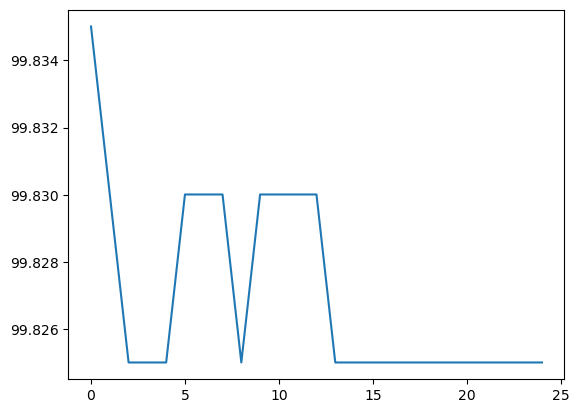

In [86]:
import matplotlib.pyplot as plt
p=plt.plot(lst)

# SVM

In [87]:
from sklearn.svm import SVC
svc=SVC() 

In [88]:
svc.fit(x_train,y_train)

SVC()

In [89]:
s_p=svc.predict(x_test)
#s_p

In [90]:
cs=confusion_matrix(s_p,y_test)
cs

array([[19911,    36],
       [    0,    54]], dtype=int64)

In [91]:
acc_s=cs.diagonal().sum()/cs.sum()*100
acc_s

99.82000899955003

In [92]:
print(classification_report(s_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19947
           1       0.60      1.00      0.75        54

    accuracy                           1.00     20001
   macro avg       0.80      1.00      0.87     20001
weighted avg       1.00      1.00      1.00     20001



# Naive Bayes

In [93]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [94]:
nb.fit(x_train,y_train)

MultinomialNB()

In [95]:
n_p=nb.predict(x_test)
#n_p

In [96]:
nc=confusion_matrix(n_p,y_test)
nc

array([[19910,    31],
       [    1,    59]], dtype=int64)

In [97]:
acc_n=nc.diagonal().sum()/nc.sum()*100
acc_n

99.84000799960002

In [98]:
print(classification_report(n_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19941
           1       0.66      0.98      0.79        60

    accuracy                           1.00     20001
   macro avg       0.83      0.99      0.89     20001
weighted avg       1.00      1.00      1.00     20001



# Logistic Regression

In [99]:
from  sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [100]:
lg.fit(x_train,y_train)

LogisticRegression()

In [101]:
lg_p1=lg.predict(x_test)
#lg_p1

In [102]:
lg_prob1=lg.predict_proba(x_test)
lg_prob1

array([[9.99687366e-01, 3.12634072e-04],
       [9.99999792e-01, 2.07557934e-07],
       [9.95132558e-01, 4.86744226e-03],
       ...,
       [9.99990778e-01, 9.22230206e-06],
       [9.99948145e-01, 5.18547368e-05],
       [1.00000000e+00, 5.72370675e-13]])

In [105]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [112]:
print(metrics.accuracy_score(y_test,lg_p1))

0.9982500874956253


In [113]:
lg_m1=confusion_matrix(lg_p1,y_test)
lg_m1

array([[19910,    34],
       [    1,    56]], dtype=int64)

In [121]:
lg_acc1=lg_m1.diagonal().sum()/lg_m1.sum()*100
lg_acc1

99.82500874956253

In [122]:
from sklearn.metrics import classification_report

In [140]:
list1=["Ada Boost","Decision Tree Regressor","Random Forest","KNN","SVM","Naive Bayes","Logistic Regression"]
list2=[ad_acc,dt_acc,rf_acc,kacc,acc_s,acc_n,lg_acc1]

In [141]:
final_result=pd.DataFrame({"Model_Name":list1,"Accuracy":list2})
final_result

,Model_Name,Accuracy
0,Ada Boost,99.940003
1,Decision Tree Regressor,99.925004
2,Random Forest,99.900005
3,KNN,99.825009
4,SVM,99.820009
5,Naive Bayes,99.840008
6,Logistic Regression,99.825009


# ClassImabalance

# Random Undersampling

In [158]:
c_0,c_1=df["isFraud"].value_counts()
c_0,c_1

(99524, 477)

In [159]:
train_0=df[df["isFraud"]==0]
train_1=df[df["isFraud"]==1]

In [160]:
train_0.shape,train_1.shape

((99524, 10), (477, 10))

In [161]:
class_0under=train_0.sample(c_1)

In [162]:
class0_1=pd.concat([class_0under,train_1],axis=0)
class0_1.head(1)
#class0_1.shape

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
37020,9,3,3681.27,12450,51872.0,48190.73,18807,0.0,0.0,0


In [163]:
class0_1.isFraud.value_counts()

0    477
1    477
Name: isFraud, dtype: int64

In [164]:
u_x=class0_1.iloc[:,0:8]
u_y=class0_1.iloc[:,-1]

In [165]:
u_x_train,u_x_test,u_y_train,u_y_test=train_test_split(u_x,u_y,test_size=0.2,random_state=100)
u_x_train.shape,u_x_test.shape,u_y_train.shape,u_y_test.shape

((763, 8), (191, 8), (763,), (191,))

# Ada Boost with Random Undersampling

In [166]:
ad.fit(u_x_train,u_y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=2)

In [167]:
op=ad.predict(u_x_test)

In [168]:
o_cf=confusion_matrix(op,u_y_test)
o_cf

array([[94,  1],
       [ 2, 94]], dtype=int64)

In [169]:
ad1_acc=o_cf.diagonal().sum()/o_cf.sum()*100
ad1_acc


98.42931937172776

In [170]:
print(classification_report(op,u_y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        95
           1       0.99      0.98      0.98        96

    accuracy                           0.98       191
   macro avg       0.98      0.98      0.98       191
weighted avg       0.98      0.98      0.98       191



# Decision Tree Regressor with Random Undersampling

In [171]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(u_x_train,u_y_train)

DecisionTreeRegressor()

In [264]:
dtr_p=dtr.predict(u_x_test)

In [265]:
dtr_cf1=confusion_matrix(dtr_p,u_y_test)
dtr_cf1


array([[95,  1],
       [ 1, 94]], dtype=int64)

In [268]:
dtr_acc=dtr_cf1.diagonal().sum()/dtr_cf1.sum()*100
dtr1_acc


98.95287958115183

In [269]:
print(classification_report(dtr_p,u_y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        96
         1.0       0.99      0.99      0.99        95

    accuracy                           0.99       191
   macro avg       0.99      0.99      0.99       191
weighted avg       0.99      0.99      0.99       191



In [270]:
from sklearn.metrics import precision_score,recall_score,f1_score
dtr_precision=precision_score(dtr_p,u_y_test)
dtr_score=recall_score(dtr_p,u_y_test)
dtr_f1=f1_score(dtr_p,u_y_test)

In [307]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f=print(f1_score(u_y_test, dtr_p, average="macro"))
p=print(precision_score(u_y_test,dtr_p, average="macro"))
r=print(recall_score(u_y_test,dtr_p, average="macro"))

0.9895285087719299
0.9895285087719299
0.9895285087719299


In [308]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
0.98952850
0.98952850
0.98952850

In [309]:
roc1=roc_auc_score(dtr_p,u_y_test)
roc1

0.9895285087719298

In [311]:
#dtr_prob=dtr.predict_proba(u_x_test)
#dtr

In [285]:
#df3=pd.DataFrame(dtr_prob)

In [286]:
fpr,tpr,threshold=roc_curve(u_y_test,df3.iloc[:,1])

Text(0.5, 1.0, 'AUC-ROC Curve')

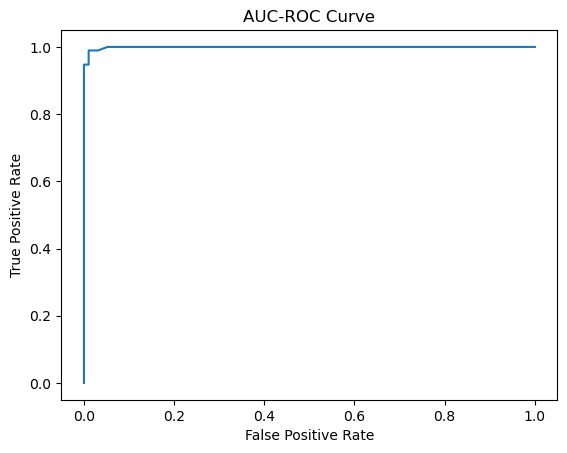

In [276]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")

# Random Forest with Random Undersampling


In [280]:
from sklearn.ensemble  import RandomForestClassifier
rf1=RandomForestClassifier()
rf1.fit(u_x_train,u_y_train)

RandomForestClassifier()

In [281]:
rf1_p=rf1.predict(u_x_test)

In [282]:
rf1_cf1=confusion_matrix(rf1_p,u_y_test)
rf1_cf1

array([[95,  3],
       [ 1, 92]], dtype=int64)

In [283]:
rf1_acc=rf1_cf1.diagonal().sum()/rf1_cf1.sum()*100
rf1_acc

97.90575916230367

In [221]:
from sklearn.metrics import classification_report

In [222]:
print(classification_report(rf1_p,u_y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        97
           1       0.98      0.99      0.98        94

    accuracy                           0.98       191
   macro avg       0.98      0.98      0.98       191
weighted avg       0.98      0.98      0.98       191



# KNN with Random Undersampling

In [287]:
knn.fit(u_x_train,u_y_train)

KNeighborsClassifier(n_neighbors=29)

In [288]:
op=knn.predict(u_x_test)

In [289]:
o_cf=confusion_matrix(op,u_y_test)
o_cf

array([[94, 19],
       [ 2, 76]], dtype=int64)

In [290]:
knn1_acc=o_cf.diagonal().sum()/o_cf.sum()*100
knn1_acc

89.00523560209425

In [291]:
print(classification_report(op,u_y_test))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       113
           1       0.80      0.97      0.88        78

    accuracy                           0.89       191
   macro avg       0.89      0.90      0.89       191
weighted avg       0.91      0.89      0.89       191



# SVM with under sampling

In [292]:
svc.fit(u_x_train,u_y_train)

SVC()

In [293]:
op=svc.predict(u_x_test)

In [294]:
o_cf=confusion_matrix(op,u_y_test)
o_cf

array([[96, 37],
       [ 0, 58]], dtype=int64)

In [295]:
svc1_acc=o_cf.diagonal().sum()/o_cf.sum()*100
svc1_acc

80.6282722513089

In [296]:
print(classification_report(op,u_y_test))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84       133
           1       0.61      1.00      0.76        58

    accuracy                           0.81       191
   macro avg       0.81      0.86      0.80       191
weighted avg       0.88      0.81      0.81       191



# Logistic Regression with Random Undersampling

In [297]:
from  sklearn.linear_model import LogisticRegression
lg1=LogisticRegression()
lg1.fit(u_x_train,u_y_train)

LogisticRegression()

In [298]:
op=lg1.predict(u_x_test)

In [299]:
lg1_prob=lg1.predict_proba(x_test)
lg1_prob

array([[0.717497  , 0.282503  ],
       [0.8705593 , 0.1294407 ],
       [0.82138163, 0.17861837],
       ...,
       [0.91904631, 0.08095369],
       [0.94234534, 0.05765466],
       [0.98793295, 0.01206705]])

In [300]:
o_cf=confusion_matrix(op,u_y_test)
o_cf

array([[93, 26],
       [ 3, 69]], dtype=int64)

In [301]:
lg11_acc=o_cf.diagonal().sum()/o_cf.sum()*100
lg11_acc

84.81675392670157

In [302]:
a=print(classification_report(op,u_y_test))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87       119
           1       0.73      0.96      0.83        72

    accuracy                           0.85       191
   macro avg       0.85      0.87      0.85       191
weighted avg       0.88      0.85      0.85       191



In [303]:
list1=["Ada Boost","Decision Tree Regressor","Random Forest","KNN","SVM","Logistic Regression"]
list2=[ad1_acc,dtr1_acc,rf1_acc,knn1_acc,svc1_acc,lg11_acc]

In [304]:
final_result1=pd.DataFrame({"Model_Name":list1,"Accuracy":list2})
final_result1

,Model_Name,Accuracy
0,Ada Boost,98.429319
1,Decision Tree Regressor,98.952880
2,Random Forest,97.905759
3,KNN,89.005236
4,SVM,80.628272
5,Logistic Regression,84.816754


From the final_result, Decision Tree Regressor model is better fitted to this dataset as compair to other model.